In [1]:
! pip install ipywidgets
! jupyter nbextension enable --py widgetsnbextension

import ipywidgets as widgets
from ipywidgets import interact, interact_manual

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: OK


# Gamma Distribution

This notebook will introduce you to the Gamma Distribution and its use cases. Interactive widgets help you understand the behavior of this distribution better. You will be experimenting with a real-life example - fishing!

### Table of Contents:
 - Definition of Gamma Function
 - Gamma Distribution - Introduction
     - Properties
 - Interactive Plot of PDF
 - Real-life Example - Fishing
     - Interaction
 - References

# Gamma function
Recall that $\Gamma (k)$ is the [Gamma function](https://en.wikipedia.org/wiki/Gamma_function)
$$
{\displaystyle \Gamma (k)=\int _{0}^{\infty }x^{k-1}e^{-x}\,dx,\ \qquad k>0 .}
$$

It is a generalization of factorial. In fact, for any positive integer $n$
$$
\Gamma (n)=(n-1)!
$$
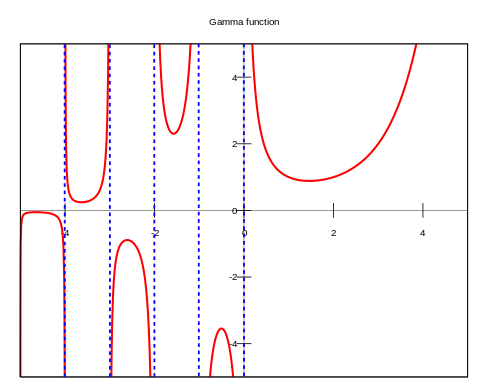

# Gamma Distribution - Definition
Gamma distribution is a distribution that arises naturally in processes for which the waiting times between events are relevant. It can be thought of as a waiting time between Poisson distributed events. The exponential distribution, and chi-squared distribution are special cases of the gamma distribution. 
Formally, we can parametrize it using shape parameter $k$ and scale $θ$:
$$
{\displaystyle X\sim \Gamma (k,\theta )\equiv \operatorname {Gamma} (k,\theta )}
$$

and the probability distribution is described as
$$
f(x;k,\theta) =  \frac{x^{k-1}e^{-\frac{x}{\theta}}}{\theta^k\Gamma(k)} \quad \text{ for } x > 0 \text{ and } k, \theta > 0.
$$

where

- $e$ is the natural number ($e$ = 2.71828…)
- $k$ is the number of occurrences of an event
- if $k$ is a positive integer, then Γ(k) = (k − 1)! is the gamma function
- $\theta = 1/\lambda$ is the mean number of events per time unit, where $\lambda$ is the mean time between events. For example, if the mean time between phone calls is 2 hours, then you would use a gamma distribution with $\theta = 1/2 = 0.5$. If we want to find the mean number of calls in 5 hours, it would be $5 \times 1/2 = 2.5$.
- $x$ is a random variable

  
There is also another parametrization using shape $\alpha$ and rate $\beta$ which you can look up at Wikipedia. 

## Properties

$$
\mu = k \theta  \\
\sigma ^ 2 = k \theta ^ 2
$$

Keep in mind that, for large $k$ the gamma distribution converges to **normal distribution**.

# Interactive PDF plot

In [2]:
import numpy as np
import scipy.stats as stats 
from matplotlib import pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [3]:
@interact(k=widgets.FloatSlider(min=0.0, max=50, step=0.5, value=9.), 
          theta=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=0.5))
def plot_gamma(k, theta):
    fig, ax = plt.subplots()

    x = np.linspace (0, 20, 100) 
    y1 = stats.gamma.pdf(x, a=k, scale=theta)
    ax.plot(x, y1, "y-", label=(fr'$k={k}, \theta={theta}$')) 
    ax.set_title(fr'$\Gamma(k, \theta)$ - distribution')

    ax.legend()
    ax.set_ylim([0,0.6])
    ax.set_xlim([0,20])
    ax.set_xticks(range(20))
    return fig, ax


interactive(children=(FloatSlider(value=9.0, description='k', max=50.0, step=0.5), FloatSlider(value=0.5, desc…

# Applications

The gamma distribution can be used a range of disciplines including queuing models, climatology, and financial services. Examples of events that may be modeled by gamma distribution include:

- The amount of rainfall accumulated in a reservoir
- The size of loan defaults or aggregate insurance claims
- The flow of items through manufacturing and distribution processes
- The load on web servers
- The many and varied forms of telecom exchange
- The gamma distribution is also used to model errors in a multi-level Poisson regression model because the combination of a Poisson distribution and a gamma distribution is a negative binomial distribution.

# Real-life Example - Fishing 

Suppose you are fishing and you expect to get a fish once every $1/2$ hour. Compute the probability that you will have to wait between 2 to 4 hours before you catch 4 fish.

One fish every 1/2 hour means we would expect to get $\theta = 1 / 0.5 = 2$ fish every hour on average. Using $\theta  = 2$ and $k = 4$, we can compute this as follows:

$$
P(2\le X\le 4)=\sum_{x=2}^4\frac{x^{4-1}e^{-x/2}}{\Gamma(4)2^4}=0.12388
$$

## Interaction

Play with the interactive widget demonstrating the example. Change the variable $\theta$ - fish rate, $k$ - number fish to catch. The area under the curve shows the expected waiting time to catch the $k$-th fish

In [4]:
from matplotlib.patches import Polygon


@interact(k=widgets.IntSlider(min=1, max=20, step=1, value=4), 
          theta=widgets.FloatSlider(min=0.1, max=5, step=0.1, value=2.),
          a = widgets.FloatSlider(min=0, max=20, step=0.25, value=2),
          b = widgets.FloatSlider(min=0, max=20, step=0.25, value=4))
def plot_fish_example(k, theta, a=2, b=4):
    fig, ax = plot_gamma(k, theta)
    # Make the shaded region
    ix = np.linspace(a, b)
    iy = stats.gamma.pdf(ix, a=k, scale=theta)
    verts = [(a, 0), *zip(ix, iy), (b, 0)]
    poly = Polygon(verts, facecolor='0.9', edgecolor='0.5')
    
    intg_value = stats.gamma.cdf(b, a=k, scale=theta) - stats.gamma.cdf(a, a=k, scale=theta)
    
    text_y = max(iy.min() / 2, 0.01)
    ax.text(0.5 * (a + b), text_y, r"$\int_a^b \Gamma(x; k, \theta)\mathrm{d}x$ = %0.2f" % intg_value,
        horizontalalignment='center')

    ax.add_patch(poly)
    ax.set_ylim([0, 0.15])

interactive(children=(IntSlider(value=4, description='k', max=20, min=1), FloatSlider(value=2.0, description='…

# Refernces

 - http://wiki.stat.ucla.edu/socr/index.php/AP_Statistics_Curriculum_2007_Gamma
 - Probability and Statistics by Morris H. Degroot, Mark J. Schervish (Fourth edition, page 319)